In [95]:
%load_ext autoreload
%autoreload 2

import network
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from numba import jit, int8, int32, float64

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Aufgabe 3
Berechne die mittlere quadratische Position einer Zufälligen Teilchenbewegung in Abghängigkeit der Schrittzahl (Zeit).
Die Funktion `random_walk()` gibt eine Liste mit x- und y-Positionen aus. Die mittlere quadratische Positionen für die $n$-te Schrittzahl wird wie folgt berechnet $$\overline{X}_n=\sqrt{\sum_{i=1}^n \frac{\vec{x}_i^2}{n}}=\sqrt{\sum_{i=1}^n \frac{x_i^2+y_i^2}{n}}$$ 

In [60]:
@jit(float64[:](int8[:,:]))
def mid_quad_pos(chain):
    result = np.zeros(len(chain), dtype=np.float64)
    a = 0
    for i in range(len(chain)):
        c = chain[i]
        a += (c[0]*c[0] + c[1]*c[1])
        result[i] = np.sqrt(a / (i+1))
    return result

@jit(float64[:,:](int32, int32))
def random_walks(n_walks, n_steps):
    y = np.zeros((n_walks, n_steps), dtype=np.float64)
    for i in range(len(y)):
        c = network.random_walk(n_steps, False, False, False)
        y[i] = mid_quad_pos(c)
    return y

@jit(float64[:](int32, int32))
def random_walks2(n_walks, n_steps):
    c = np.zeros((n_walks, n_steps, 6), dtype=np.float64)
    for i in range(n_walks):
        c[i] = network.random_walk(n_steps, False, False, False)
    y = np.zeros(n_steps, dtype=np.float64)
    for i in range(n_steps):
        a = 0
        for j in range(n_walks):
            a += (c[j][i][0]**2 + c[j][i][1]**2)
        y[i] = np.sqrt(a / (i+1))
    return y
    

Es wird 

In [69]:
n_steps = 100_000
n_walks = 1000
y0 = np.average(random_walks(n_walks, n_steps), axis=0)
#y0 = random_walks2(n_walks, n_steps)

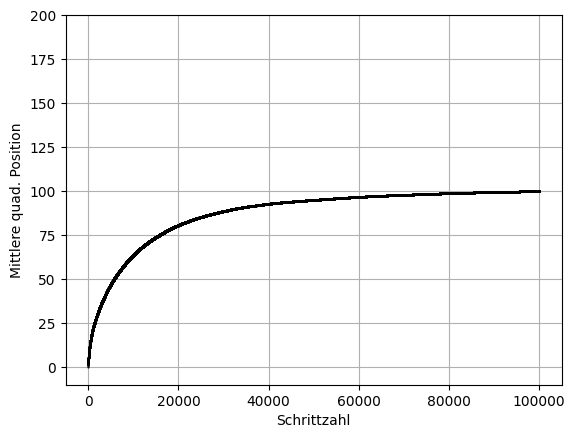

In [101]:

#y = mid_quad_pos(c0)
x = np.arange(1, n_steps + 1)
fig, ax = plt.subplots()
ax.plot(x, y0, '.k', markersize=1, linewidth=0.5)
ax.set_xlabel('Schrittzahl')
ax.set_ylabel('Mittlere quad. Position')
#ax.set_xscale('log')
ax.set_ylim(-10, 200)

#ax.plot(x, y, '--')
plt.grid()

Nun mit "self-avoiding" random walk. Gleiches prinzip, allerdings brechen die random walks spätestens nach ~400 ab die sie sich selbst den weg verbaut haben.

In [104]:
@jit(float64[:](int32, int32))
def random_walks_sa(n_walks, n_steps):
    y = []
    for i in range(n_walks):
        c = network.random_walk(n_steps, False, True, False)
        y.append(mid_quad_pos(c))
    y0 = np.zeros(n_steps, dtype=np.float64)
    n = np.zeros(n_steps, dtype=np.int32)
    for i in range(n_steps):
        for j in range(n_walks):
            s = len(y[j])
            if i < s:
                y0[i] += y[j][i]
                n[i] += 1
    return y0 / n

In [107]:
n_steps = 500
n_walks = 1000
y0 = random_walks_sa(n_walks, n_steps)

Nowhere to run at 4,-5 at length 88
Nowhere to run at 6,-2 at length 65
Nowhere to run at 11,-2 at length 28
Nowhere to run at -14,15 at length 196
Nowhere to run at -19,7 at length 85
Nowhere to run at -10,-1 at length 58
Nowhere to run at -8,-10 at length 49
Nowhere to run at 4,-13 at length 38
Nowhere to run at -10,-10 at length 67
Nowhere to run at -1,0 at length 30
Nowhere to run at 9,10 at length 92
Nowhere to run at 12,-10 at length 61
Nowhere to run at 9,-7 at length 139
Nowhere to run at 5,-3 at length 25
Nowhere to run at -1,5 at length 23
Nowhere to run at 2,12 at length 141
Nowhere to run at 10,-19 at length 194
Nowhere to run at 16,-1 at length 42
Nowhere to run at 10,28 at length 179
Nowhere to run at 1,0 at length 44
Nowhere to run at -4,0 at length 81
Nowhere to run at -12,-5 at length 56
Nowhere to run at 10,4 at length 83
Nowhere to run at 23,-31 at length 211
Nowhere to run at -2,-2 at length 13
Nowhere to run at -22,-4 at length 99
Nowhere to run at 0,6 at length 37

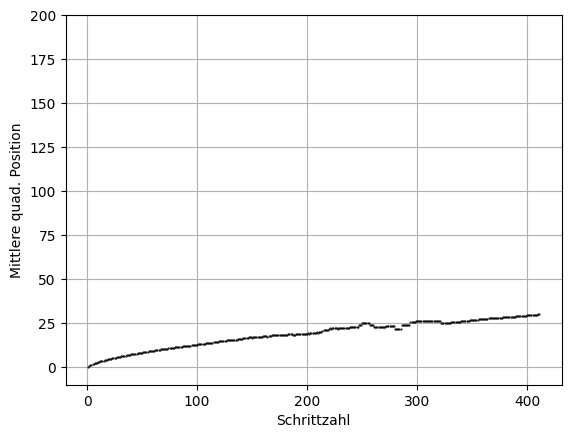

In [108]:
x = np.arange(1, n_steps + 1)
fig, ax = plt.subplots()
ax.plot(x, y0, '.k', markersize=1, linewidth=0.5)
ax.set_xlabel('Schrittzahl')
ax.set_ylabel('Mittlere quad. Position')
#ax.set_xscale('log')
ax.set_ylim(-10, 200)

#ax.plot(x, y, '--')
plt.grid()